Objective: Using a nurse's location, nurse group to anticipate how many patients they will manage


In [34]:
import pandas as pd

# Read the dataset
df = pd.read_csv('dummy.csv')

# Drop unneccessary columns
#df = df.drop('Department Name', axis=1)
#df = df.drop('Nurse User Name', axis=1)

# Print information about the dataset
print(df.head())


  Location Name           Nurse Group Name  Total Patients Handled
0          Loc2                  Other N/A                       1
1          Loc3                  Other N/A                       1
2          Loc1  Intake Care Coordinators                        1
3          Loc1  Intake Care Coordinators                        1
4          Loc1  Intake Care Coordinators                        1


In [35]:
# Assuming your target variable is named 'Total Patients Handled'
target_classes = df['Total Patients Handled'].value_counts()
print(target_classes)


32     68
67     67
29     53
16     50
46     46
       ..
12      1
40      1
142     1
119     1
42      1
Name: Total Patients Handled, Length: 65, dtype: int64


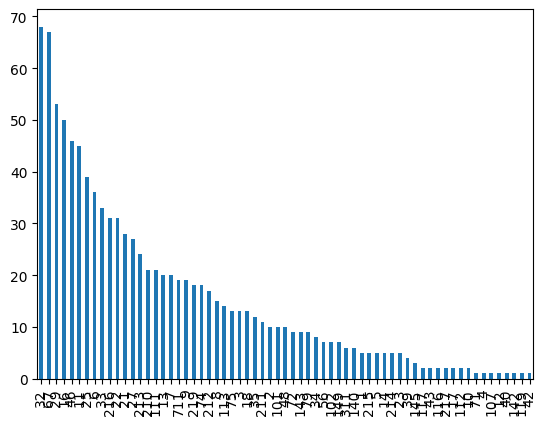

In [36]:
import matplotlib.pyplot as plt

target_classes.plot.bar()
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder is used to encode category characteristics.
le = LabelEncoder()
df['Location Name'] = le.fit_transform(df['Location Name'])
df['Nurse Group Name'] = le.fit_transform(df['Nurse Group Name'])


In [38]:
from sklearn.model_selection import train_test_split

# Separate the data into the target variable (y) and the input characteristics (X)
X = df[['Location Name', 'Nurse Group Name']]
y = df['Total Patients Handled']

# Create training and test sets from the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
#Scale the data
scaler = StandardScaler()
XtrainScaled = scaler.fit_transform(X_train)
XtestScaled = scaler.fit_transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Build a model
model = GradientBoostingRegressor()
model.fit(XtrainScaled, y_train)

#Make new predictions
y_pred = model.predict(XtestScaled)

# Make a new test prediction
#new_nurse = [[1, 2, 9]]
#predicted_number_of_patients = model.predict(new_nurse)

#print(predicted_number_of_patients)


In [41]:

from sklearn.metrics import mean_squared_error, r2_score

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: {:.3f}'.format(mse))
print('R2 score: {:.3f}'.format(r2))


Mean squared error: 9445.753
R2 score: 0.201


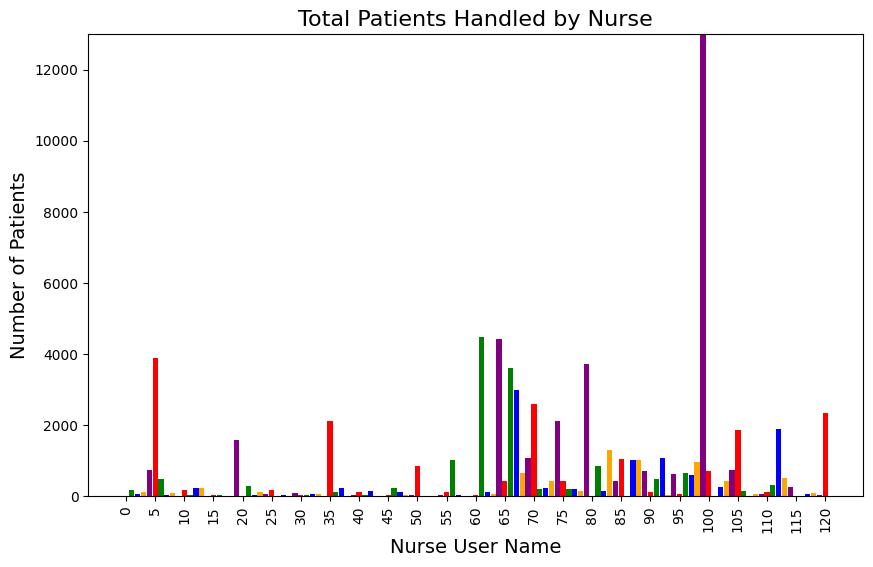

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the data by nurse name, then determine how many patients were served by each nurse.
nurse_totals = df.groupby('Nurse User Name')['Total Patients Handled'].sum()

# Make a stacked bar chart of the nurse totals by using the following code:
fig, ax = plt.subplots(figsize=(10, 6)) 
ax.bar(nurse_totals.index, nurse_totals, color=['red', 'green', 'blue', 'orange', 'purple'], width=0.9) 
ax.set_xlabel('Nurse User Name', fontsize=14)  
ax.set_ylabel('Number of Patients', fontsize=14)  
ax.set_title('Total Patients Handled by Nurse', fontsize=16)  
ax.tick_params(axis='x', labelrotation=90)  
ax.set_ylim(0, 13000)  
ax.set_xticks(range(0, len(nurse_totals.index), 5))  
ax.set_xticklabels(nurse_totals.index[::5], fontsize=10) 
plt.show()


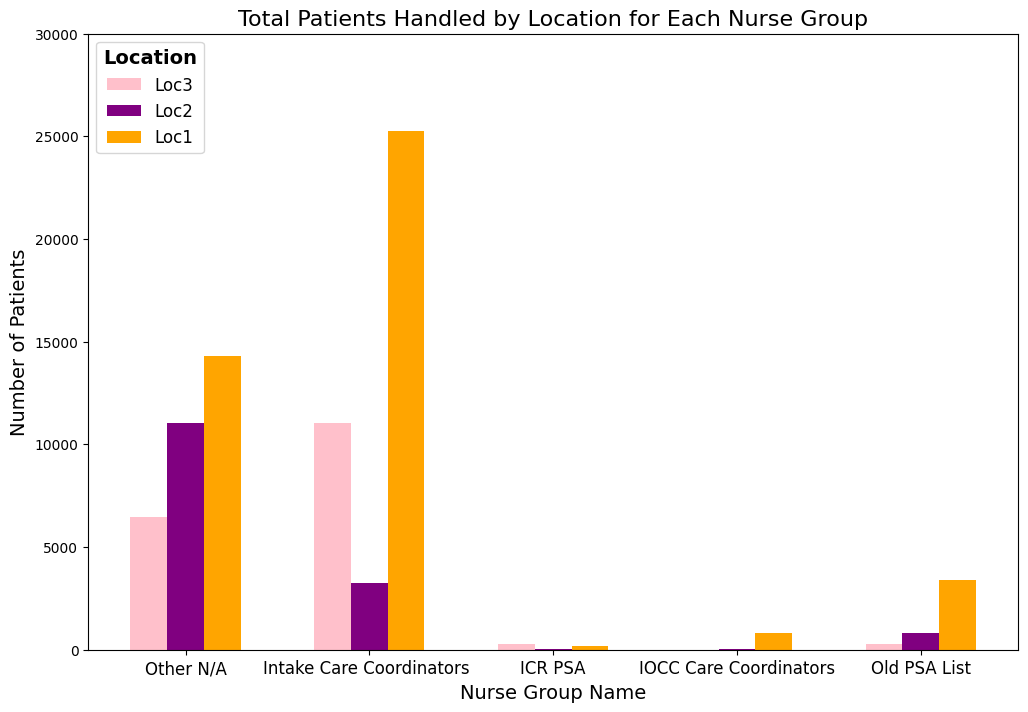

In [64]:
# Calculate the total number of patients for each group and location by grouping the data by the nursing group name and location name
grouped_totals = df.groupby(['Nurse Group Name', 'Location Name'])['Total Patients Handled'].sum()

# Make a grouping of the nurse group totals by location into a bar chart.
fig, ax = plt.subplots(figsize=(12, 8))
locations = df['Location Name'].unique()
bar_width = 0.2
groups = df['Nurse Group Name'].unique()

#Set colours of the bars
colors = ['pink', 'purple', 'orange']
for i, loc in enumerate(locations):
    loc_totals = np.zeros(len(groups))
    for j, group in enumerate(groups):
        if (group, loc) in grouped_totals.index:
            loc_totals[j] = grouped_totals[(group, loc)]
    x = [j + i * bar_width for j in range(len(groups))]
    ax.bar(x, loc_totals, bar_width, label='Loc{}'.format(i+1), color=colors[i % len(colors)])

#Set the x label and y label
ax.set_xlabel('Nurse Group Name', fontsize=14)
ax.set_ylabel('Number of Patients', fontsize=14)
ax.set_title('Total Patients Handled by Location for Each Nurse Group', fontsize=16)
ax.set_ylim(0, 30000) 
ax.set_xticks([j + bar_width * (len(locations) - 1) / 2 for j in range(len(groups))])
ax.set_xticklabels(['Other N/A', 'Intake Care Coordinators ', 'ICR PSA', 'IOCC Care Coordinators', 'Old PSA List'], fontsize=12)

#Define the legend values
legend_labels = ['Loc3', 'Loc2', 'Loc1']
ax.legend(legend_labels, title='Location', fontsize=12, title_fontsize=12, loc='upper left')
ax.get_legend().get_title().set_fontsize('14')
ax.get_legend().get_title().set_fontweight('bold')
ax.get_legend().get_title().set_color('black')
plt.show()
